In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import math
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [47]:
input_size = 784 
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.01
## defining the hyper parameters.

In [48]:
train_ds=torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)
test_ds=torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

train_loader=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=False)

# loading the MNIST dataset available on torchvision



torch.Size([100, 1, 28, 28]) torch.Size([100])


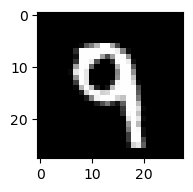

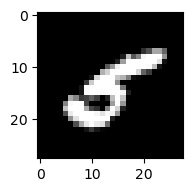

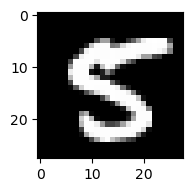

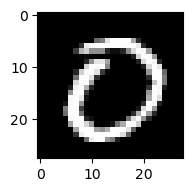

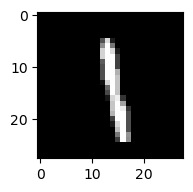

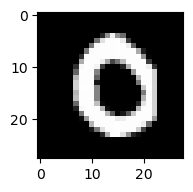

In [43]:
examples=iter(train_loader)
samples, labels=examples._next_data()
print(samples.shape,labels.shape)

# 100 is the batch size, 1 is the channel size

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()
# just viewing some images

In [44]:
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size=input_size
        self.l1=nn.Linear(input_size, hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        output=self.l1(x)
        output=self.relu(output)
        output=self.l2(output)
        # final output will be when it passes through all the layers
        return output
    

In [49]:
model=NeuralNet(input_size,hidden_size,num_classes)

# loss

criterion=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        images=images.reshape(-1,784).to(device)
        # we are reshaping the images
        # 100, 1, 28 28
        labels=labels.to(device)

        # forward
        outputs=model(images)
        loss=criterion(outputs, labels)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)% 100==0:
            print(f'epoch {epoch+1}/{num_epochs},step{i+1}/{n_total_steps},loss={loss.item()}' )



        

epoch 1/3,step100/600,loss=0.2504325211048126
epoch 1/3,step200/600,loss=0.22864048182964325
epoch 1/3,step300/600,loss=0.25379908084869385
epoch 1/3,step400/600,loss=0.11628910899162292
epoch 1/3,step500/600,loss=0.1390468329191208
epoch 1/3,step600/600,loss=0.269621878862381
epoch 2/3,step100/600,loss=0.133260577917099
epoch 2/3,step200/600,loss=0.0564551055431366
epoch 2/3,step300/600,loss=0.08270440995693207
epoch 2/3,step400/600,loss=0.1274796575307846
epoch 2/3,step500/600,loss=0.09360489249229431
epoch 2/3,step600/600,loss=0.098907969892025
epoch 3/3,step100/600,loss=0.02501404471695423
epoch 3/3,step200/600,loss=0.037594567984342575
epoch 3/3,step300/600,loss=0.1099742129445076
epoch 3/3,step400/600,loss=0.45065420866012573
epoch 3/3,step500/600,loss=0.06321194022893906
epoch 3/3,step600/600,loss=0.06712130457162857


Predicted:
tensor(1)
Actual
tensor(1)


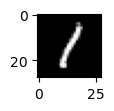

Predicted:
tensor(4)
Actual
tensor(4)


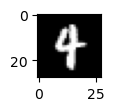

Predicted:
tensor(6)
Actual
tensor(6)


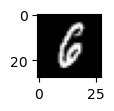

Predicted:
tensor(8)
Actual
tensor(8)


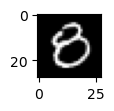

Predicted:
tensor(3)
Actual
tensor(3)


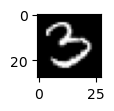

Predicted:
tensor(5)
Actual
tensor(5)


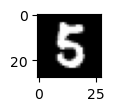

Predicted:
tensor(4)
Actual
tensor(4)


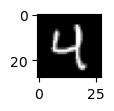

Predicted:
tensor(8)
Actual
tensor(8)


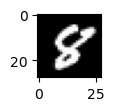

Predicted:
tensor(3)
Actual
tensor(3)


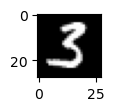

Predicted:
tensor(7)
Actual
tensor(7)


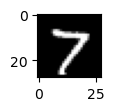

Predicted:
tensor(1)
Actual
tensor(1)


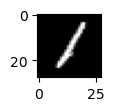

Predicted:
tensor(9)
Actual
tensor(9)


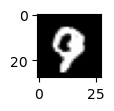

Predicted:
tensor(8)
Actual
tensor(8)


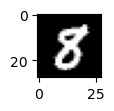

Predicted:
tensor(3)
Actual
tensor(3)


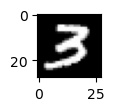

Predicted:
tensor(3)
Actual
tensor(3)


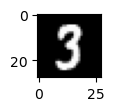

Predicted:
tensor(5)
Actual
tensor(5)


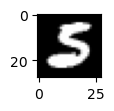

Predicted:
tensor(7)
Actual
tensor(7)


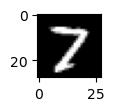

Predicted:
tensor(8)
Actual
tensor(8)


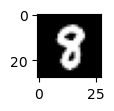

Predicted:
tensor(9)
Actual
tensor(9)


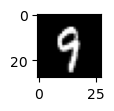

Predicted:
tensor(3)
Actual
tensor(3)


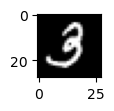

accuracy=96.4


In [50]:
# MNIST
# Dataloader, Transformer
# Multilayer Neural Net, activation func
# Calculate loss and gradients
# update 
# final accuracy

with torch.no_grad():
    n_correct=0
    n_samples=0
    i=0
    
    

    for images, labels in test_loader:
        
        i+=1
        
        
        images1=images.reshape(-1,784).to(device)
        labels=labels.to(device)
        outputs=model(images1)
        
        predictions=torch.max(outputs, 1)[1]
        
        if (i%5==3):
            plt.subplot(5,4,1)
            plt.imshow(images[i-1][0],cmap='gray')
            
            print("Predicted:")
            print(predictions[i-1])
            print("Actual")
            print(labels[i-1])
        plt.show()
        n_samples+=labels.shape[0]

        n_correct+=(predictions==labels).sum().item()
    acc=100.0*n_correct/n_samples
    print(f'accuracy={acc}')

